### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint

[nltk_data] Error loading stopwords: <urlopen error [Errno 61]
[nltk_data]     Connection refused>


#### Read DataFrames

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

#### Check Missing Values

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17307 entries, 0 to 17306
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   essay_id   17307 non-null  object
 1   full_text  17307 non-null  object
 2   score      17307 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 405.8+ KB


#### Explore Text Data

In [6]:
# get word count, sentence count, and paragraph count, and vocabulary as extra features for visualization
train_df['word_count'] = train_df['full_text'].str.split().str.len()
train_df['sentence_count'] = train_df['full_text'].str.strip().str.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s').str.len()
train_df['paragraph_count'] = train_df['full_text'].str.split('\n\n').str.len()
train_df['vocab_size'] = train_df['full_text'].str.split().apply(set).apply(len)


#### Data Distribution for Multiple Variables (pairplot)

/Users/yutao/anaconda3/envs/dsan6600/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yutao/anaconda3/envs/dsan6600/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yutao/anaconda3/envs/dsan6600/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yutao/anaconda3/envs/dsan6600/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

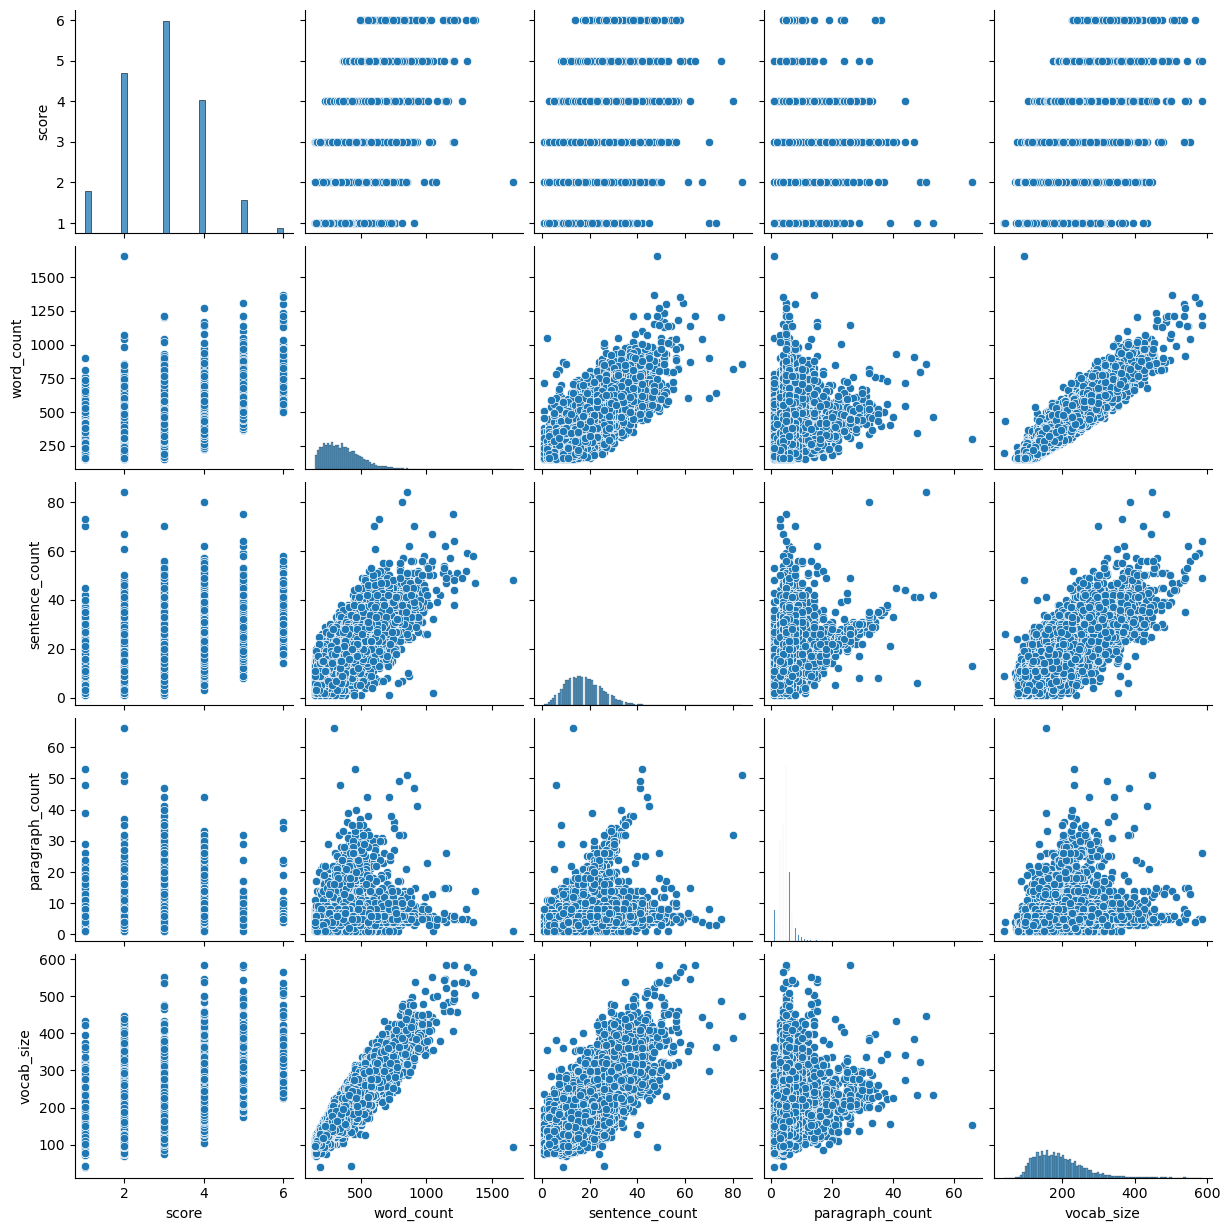

In [7]:
sns.pairplot(data = train_df.drop('full_text',axis = 1))

Positive correlation between score and word count observed

#### Data Distribution for single variables

/Users/yutao/anaconda3/envs/dsan6600/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


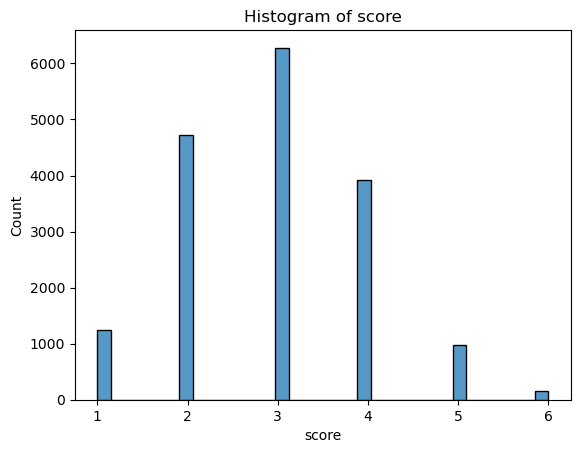

/Users/yutao/anaconda3/envs/dsan6600/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


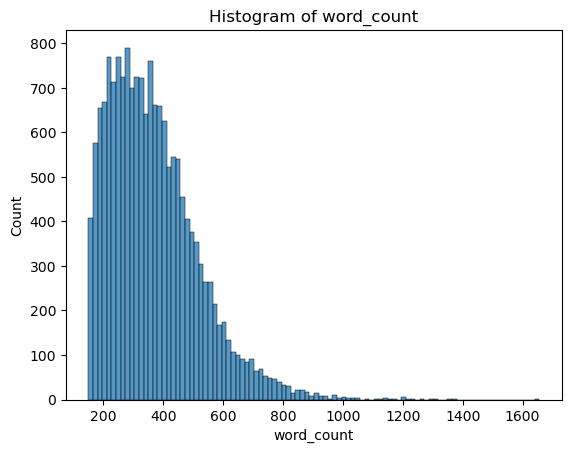

/Users/yutao/anaconda3/envs/dsan6600/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


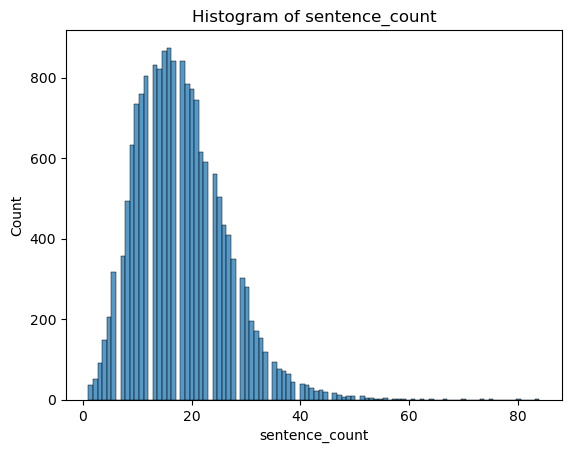

/Users/yutao/anaconda3/envs/dsan6600/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


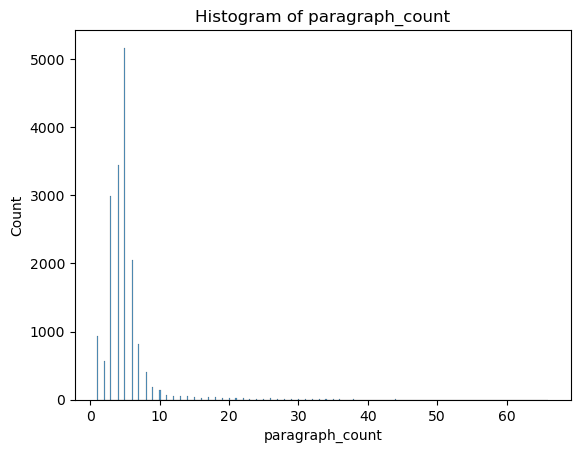

/Users/yutao/anaconda3/envs/dsan6600/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


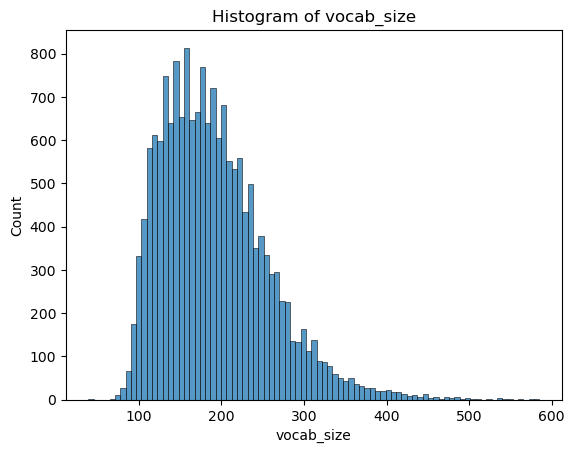

In [18]:
df = train_df.drop(['essay_id','full_text'],axis = 1)
for i in range(len(df.columns)):
    sns.histplot(df.iloc[:,i])
    plt.title(f"Histogram of {df.columns[i]}")
    plt.show()

#### Check Vocabulary size for the whole dataframe

In [8]:
# vocabulary size

corpus = " ".join(train_df['full_text'])

words = corpus.split()

n_vocabs = len(set(words))
print(n_vocabs)


129566


#### Topic Modelling (LDA)

In [9]:
def preprocess_data(documents):
  stop_words = stopwords.words('english')
  
  # Tokenize and remove stopwords
  texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in documents]
  return texts


In [10]:
text = preprocess_data(train_df['full_text'])

In [11]:
id2word = corpora.Dictionary(text)
corpus = [id2word.doc2bow(text) for text in text]
num_topics = 5
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=10, alpha='auto', per_word_topics=True)
pprint(lda_model.print_topics())

[(0,
  '0.068*"venus" + 0.025*"planet" + 0.022*"earth" + 0.019*"author" + '
  '0.013*"would" + 0.011*"like" + 0.009*"could" + 0.008*"also" + '
  '0.008*"surface" + 0.008*"humans"'),
 (1,
  '0.038*"cars" + 0.035*"car" + 0.018*"driverless" + 0.016*"would" + '
  '0.015*"people" + 0.011*"driving" + 0.008*"could" + 0.008*"driver" + '
  '0.007*"many" + 0.006*"drive"'),
 (2,
  '0.022*"seagoing" + 0.020*"people" + 0.016*"get" + 0.015*"luke" + '
  '0.015*"animals" + 0.013*"cowboys" + 0.013*"help" + 0.013*"program" + '
  '0.012*"also" + 0.012*"cowboy"'),
 (3,
  '0.024*"electoral" + 0.022*"face" + 0.020*"vote" + 0.020*"college" + '
  '0.016*"people" + 0.016*"mars" + 0.014*"president" + 0.011*"would" + '
  '0.010*"states" + 0.009*"electors"'),
 (4,
  '0.019*"students" + 0.019*"could" + 0.018*"technology" + 0.015*"emotions" + '
  '0.015*"would" + 0.014*"help" + 0.014*"facial" + 0.013*"computer" + '
  '0.013*"student" + 0.010*"system"')]
